In [2]:
import pandas as pd
import numpy as np

## Get data

In [3]:
data = pd.read_csv('measurements.csv')
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [4]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    
    lst = ['distance','consume','temp_inside']
    for col in lst:
        df[col] = df[col].str.replace(',', '.').astype(float)
    return df

In [5]:
clean_df(data)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [7]:
data2 = pd.read_excel('measurements2.xlsx')
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

#### Let's make sure they are the same data

In [8]:
data.merge(data2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


#### The files contain the same information, I will continue with my cleaned data

### I am making some assumptions about the data because column information was not provided.
- distance is measured in km
- 'consume' is liters per 100km 
- speed is length of time for the trip in minutes 
- temp is in Celcius
- AC, rain, sun are weather conditions of trip

## EDA

In [9]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [10]:
data.isna().sum()/len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

#### Over 95% missing data in the last 2 columns.  I will drop these.

In [11]:
cols_to_drop = ['refill_liters', 'refill_gas']

In [12]:
data['specials'].value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
ac rain                 1
AC Sun                  1
half rain half sun      1
AC snow                 1
AC sun                  1
Name: specials, dtype: int64

#### With 76% NaN values and this information also contained in the following 3 columns, I choose to drop this.

In [13]:
cols_to_drop.append('specials')
cols_to_drop

['refill_liters', 'refill_gas', 'specials']

In [14]:
data = data.drop(cols_to_drop, axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


#### With only 3% NaN values left I will fill temp_inside with mode

In [15]:
mode = data['temp_inside'].mode()
mode

0    21.5
dtype: float64

In [16]:
data.temp_inside.fillna(mode[0], inplace=True)


In [17]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

### Creating some new features

In [18]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [19]:
data['fuel_used'] = data.distance * data.consume/100
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


#### Current price of each type of gas in the Netherlands

#### E10 = 2.045 
#### SP98 = 2.152

In [20]:
data['cost_of_trip'] = np.where(data.gas_type == 'E10',data.fuel_used*2.045,data.fuel_used*2.152).round(3)


In [21]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.863
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,1.031
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.260
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,1.029
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.702
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.274
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.490
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.308
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.524


#### converting speed to decimal of an hour

In [22]:
data['trip_in_hours'] = data.speed/60

In [23]:
data['avg_speed'] = data['distance']/data['trip_in_hours']

In [24]:
data = data.drop(['speed'], axis = 1)

In [25]:
data.dtypes
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

In [26]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300000,11.800000,14.6000,19.000000,216.1000
consume,388.0,4.912371,1.033172,3.300000,4.300000,4.7000,5.300000,12.2000
temp_inside,388.0,21.916237,0.997449,19.000000,21.500000,22.0000,22.500000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000000,7.000000,10.0000,16.000000,31.0000
ac,388.0,0.077320,0.267443,0.000000,0.000000,0.0000,0.000000,1.0000
rain,388.0,0.123711,0.329677,0.000000,0.000000,0.0000,0.000000,1.0000
sun,388.0,0.082474,0.275441,0.000000,0.000000,0.0000,0.000000,1.0000
temp_diff,388.0,10.557990,6.700099,-8.000000,6.375000,11.5000,14.625000,26.0000
fuel_used,388.0,0.935294,1.115967,0.120000,0.551650,0.6806,0.916500,11.4533
cost_of_trip,388.0,1.968222,2.363725,0.245000,1.155000,1.4225,1.923000,24.6480


In [27]:
data.to_csv('Cobify_clean_data.csv', index= False)

## All cleaning and feature adding completed
### Looking at some visualizations

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

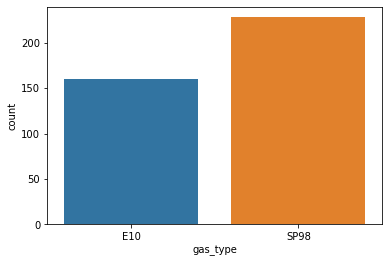

In [29]:
fig,ax = plt.subplots()
sns.countplot(x=data.gas_type)
plt.show()

## The above graph clearly shows that more of the trips have used SP98 fuel type historically

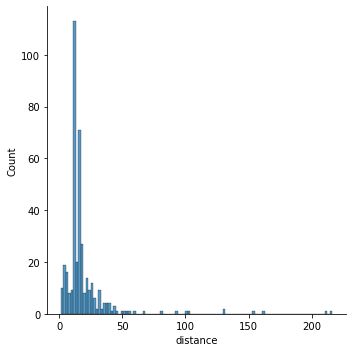

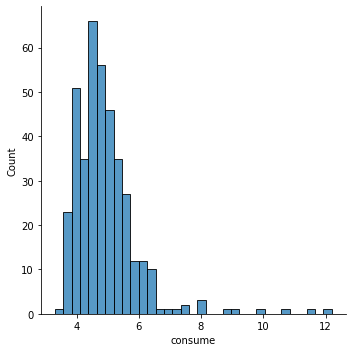

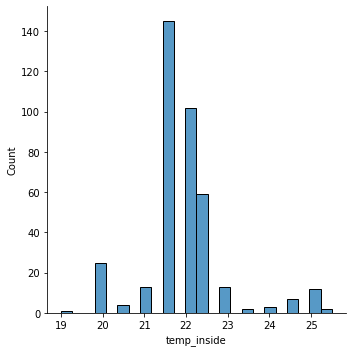

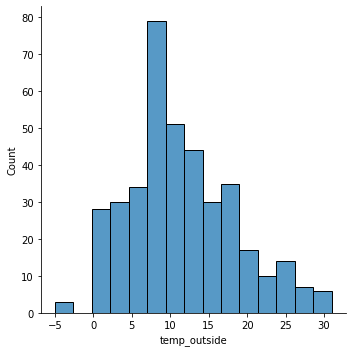

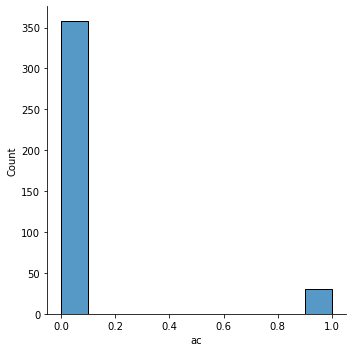

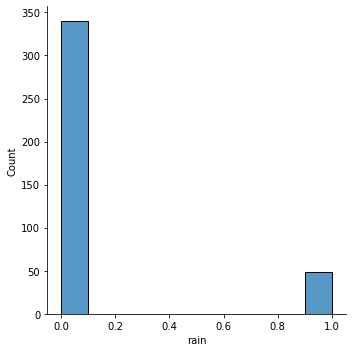

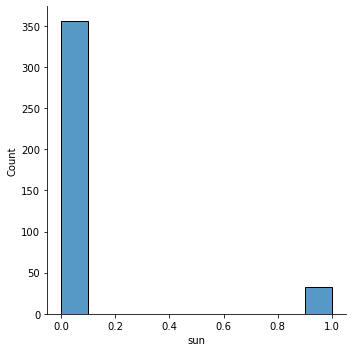

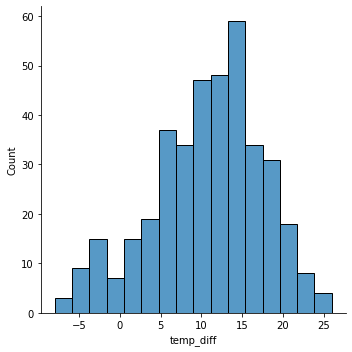

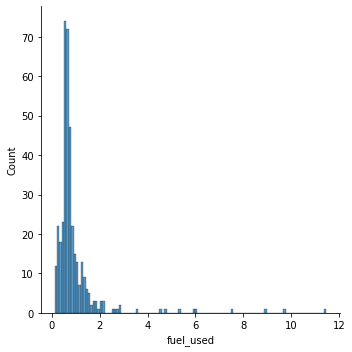

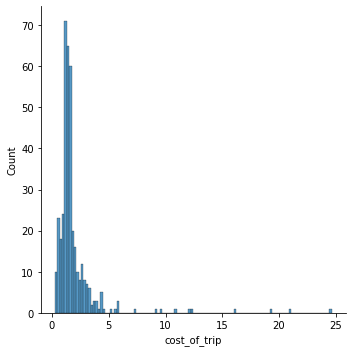

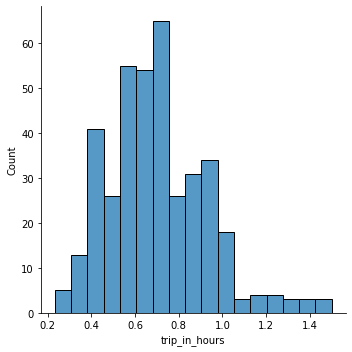

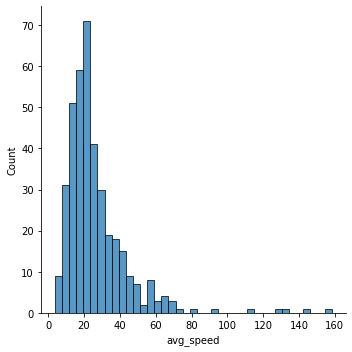

In [30]:

for column in data_num:
    sns.displot(data_num[column])
    plt.show()

### The above graphs detail the distributions of the different numerical columns.

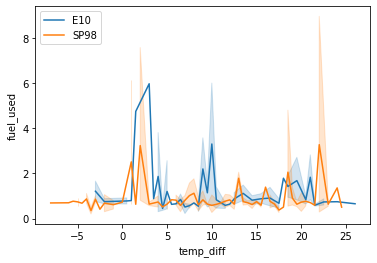

In [31]:
fig,ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["temp_diff"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["temp_diff"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show()

### The above graph shows the amount of different fuel used, depending on the difference in temperature between inside and outside.

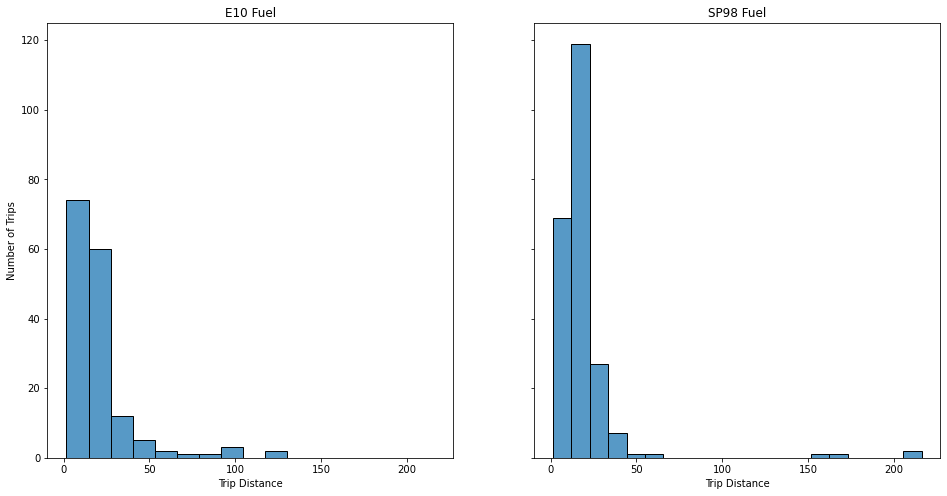

In [37]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0],data=cole10, x=cole10["distance"],bins=10,label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Trip Distance",ylabel="Number of Trips")

sns.histplot(ax=axes[1],data=col98, x=col98["distance"],bins = 20, label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Trip Distance",ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

### The above graph shows the number of trips at which distance they travel.  Note that SP98 fuel is used for the longer distances.

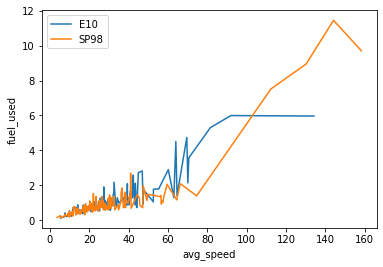

In [33]:
fig,ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["avg_speed"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["avg_speed"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show()

### The above graph shows the amount of fuel used based on average speed of trip.  The higher the average speed, the more fuel is used by SP98

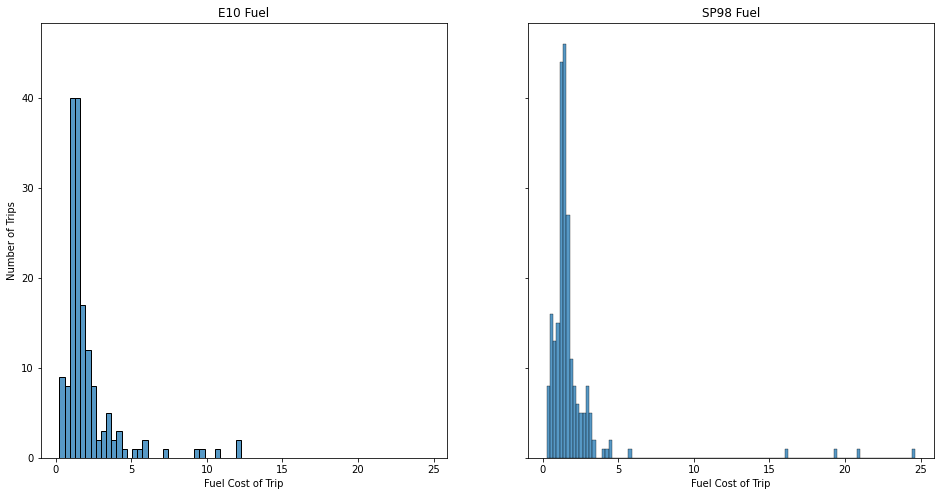

In [34]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0],data=cole10, x=cole10["cost_of_trip"],label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Fuel Cost of Trip",ylabel="Number of Trips")

sns.histplot(ax=axes[1],data=col98, x=col98["cost_of_trip"], label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Fuel Cost of Trip",ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

### The above graph shows the distrubution of the cost of fuel per trip for each fuel type.  You can see that both graphs have the same distribution. The SP98 fuel has the 4 highest trip costs.  But they also have been used for the longest trips.  It would be good to test the E10 fuel on a long trip with higher average speeds to be able to compare them properly

In [35]:
display(data['cost_of_trip'].max())
display(data['cost_of_trip'].min())

24.648

0.245

# Conclusions and Insights

### When looking at types of fuels used for the various trips, there are some suggestions I would make based on the data. 
#### --It appears that when traveling at higher speeds, most likely on highways during longer trips, that the E10 fuel is more economically sound.  I would try to assign cars that use E10 whenever the average speed is most likely to be over 100 kph.
#### -- There is not much difference between the fuel economy of either gas when used for short distances or quick trips.
#### -- I would recommend trying to use E10 fuel as much as possible as it can be significantly cheaper throughout the EU.
#### -- In terms of fuel use in different temperatures, if the temp between the inside and outside is between 0 and 10 degrees it may be better to use the SP98 fuel.  However if the difference is extreme, over 20 degrees difference, it may be better to use E10 fuel.
#### -- When choosing which car of the fleet to designate per trip, these conditions should be taken into consideration.